<a href="https://colab.research.google.com/github/fateme-karami/online-retail-predict/blob/main/marketing_campaign.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.decomposition import FactorAnalysis, PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [3]:
# Step 1: Load and preprocess data
# Reloading the dataset
data = pd.read_csv('/content/sample_data/marketing_campaign (1).csv', delimiter='\t')

In [5]:
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [6]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [15]:
# انتخاب فقط ستون‌های عددی
numeric_data = data.select_dtypes(include=['number'])

# بررسی مقادیر منفی
negative_values = (numeric_data < 0).any().any()

if negative_values:
    print("The dataset contains negative values.")
else:
    print("There are no negative values in the dataset.")

There are no negative values in the dataset.


In [7]:
data.isnull().sum()

,0
ID,0
Year_Birth,0
Education,0
Marital_Status,0
Income,24
Kidhome,0
Teenhome,0
Dt_Customer,0
Recency,0
MntWines,0


#Dataset Problems:
1) Income has missing values

2) Dt_Customer type should be date not object?

In [11]:
# Fill missing values in 'Income' with the median
data['Income'].fillna(data['Income'].median(), inplace=True)

data.isnull().sum()
# # Convert Dt_Customer column to date data type
# data['Dt_Customer'] = data['Dt_Customer'].astype('date')

<ipython-input-11-9a8f23979d67>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Income'].fillna(data['Income'].median(), inplace=True)


,0
ID,0
Year_Birth,0
Education,0
Marital_Status,0
Income,0
Kidhome,0
Teenhome,0
Dt_Customer,0
Recency,0
MntWines,0


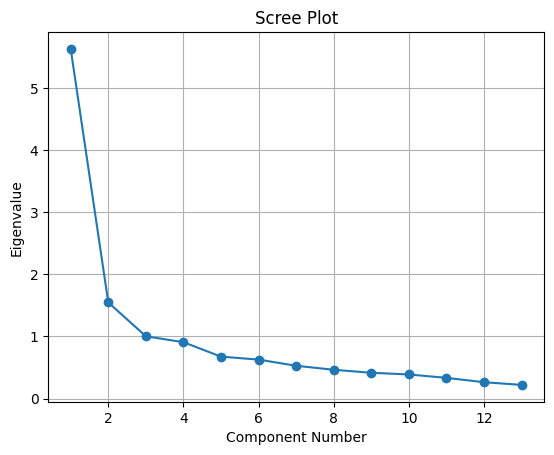

Eigenvalues from PCA:
[5.62599971 1.54775556 1.0031463  0.9081023  0.67595666 0.62773363
 0.52876313 0.46433388 0.41612272 0.38885595 0.33421338 0.26421817
 0.22060478]


In [18]:
# Encode categorical variables using one-hot encoding
data_encoded = pd.get_dummies(data, columns=['Education', 'Marital_Status'], drop_first=True)

# The selected columns are chosen based on their relevance to customer behavior and purchasing patterns:
# - 'Income': Represents the customer's income, indicating purchasing power and likelihood to spend on various products.
# - 'Recency': Reflects the number of days since the customer's last purchase, a measure of customer engagement and loyalty.
# - 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds':
#   These columns show the monetary amount spent on different product categories, highlighting individual preferences and shopping habits.
# - 'NumDealsPurchases': Represents the number of purchases using a discount, capturing the customer's tendency to seek deals.
# - 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases': Reflect the number of purchases through various channels (online, catalog, in-store), which reveals channel preferences.
# - 'NumWebVisitsMonth': Shows the number of website visits in the last month, indicating online engagement and potential interest in future purchases.
#
# These columns provide insights into customer purchasing behavior and preferences, making them suitable for factor analysis aimed at identifying underlying behavioral patterns.
#کاهش ابعاد
selected_columns = [
    'Income', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
    'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
    'NumWebVisitsMonth'
]
factor_data = data_encoded[selected_columns]

# Standardizing the data helps ensure accurate results in factor analysis by bringing all features onto a similar scale:
# - Factor analysis is sensitive to variations in feature scales. StandardScaler() transforms the data such that each feature has a mean of 0 and a standard deviation of 1, preventing features with larger scales from dominating the analysis.
# - By standardizing, we eliminate potential biases due to varying feature magnitudes (e.g., 'Income' may have larger absolute values than 'Recency').
# - This process enhances interpretability and accuracy by ensuring all features contribute equally to factor formation.

scaler = StandardScaler()
factor_data_scaled = scaler.fit_transform(factor_data)

# Step 2: Determine the number of factors using PCA
# We use Principal Component Analysis (PCA) to calculate eigenvalues, which help in deciding the optimal number of factors for factor analysis:
# - By applying PCA to the standardized data, we calculate eigenvalues for each principal component. These eigenvalues represent the amount of variance each component explains.
# - The resulting eigenvalues can be plotted on a Scree Plot, where each point corresponds to a principal component, allowing us to visually identify an "elbow point" where the explained variance significantly drops.
# - This elbow point indicates the optimal number of factors to retain. Additionally, Kaiser’s Criterion (eigenvalues > 1) can help further confirm the number of meaningful factors to keep.
#
# Together, these steps ensure that we select an adequate number of factors for accurate and interpretable results in the subsequent factor analysis.
pca = PCA()
pca.fit(factor_data_scaled)

# Plotting the Scree Plot
plt.plot(range(1, len(pca.explained_variance_) + 1), pca.explained_variance_, marker='o', linestyle='-')
plt.xlabel('Component Number')
plt.ylabel('Eigenvalue')
plt.title('Scree Plot')
plt.grid(True)
plt.show()

# Displaying eigenvalues for analysis
print("Eigenvalues from PCA:")
print(pca.explained_variance_)



In [22]:
# Step 3: Perform Factor Analysis
# Choosing 3 factors based on the Scree Plot analysis and Kaiser's Criterion:
# - The Scree Plot showed a significant drop in eigenvalues after the third component,
#   indicating that additional components explain less variance.
# - According to Kaiser's Criterion, we retain components with eigenvalues greater than 1,
#   which is satisfied for the first 3 factors.
print(" Choosing 3 factors based on the Scree Plot analysis and Kaiser's Criterion: n_components=3")

# Create the Factor Analysis model with 3 components (factors)
# The 'random_state=0' parameter ensures that the results can be reproduced
factor_model = FactorAnalysis(n_components=3, random_state=0)

# Fit the model to the scaled data and transform it to obtain the factor scores
# 'factor_data_scaled' contains the normalized data used for analysis
factors = factor_model.fit_transform(factor_data_scaled)

# Display factor loadings to see how each original feature contributes to the factors
# Factor loadings indicate the correlation between original features and the extracted factors,
# helping us understand the significance of each feature in the context of the factors
print("\nFactor loadings:")
print(factor_model.components_)

# Factor loadings (L) are calculated as follows:
# L = E × λ
# where:
# L = matrix of factor loadings
# E = matrix of eigenvectors (principal axes)
# λ = matrix of eigenvalues (variance explained by each factor)
# This formula helps us understand how each original feature is related to the extracted factors.

# Factor scores (F) are calculated as follows:
# F = X × L^T
# where:
# F = matrix of factor scores
# X = matrix of input data (original features)
# L = matrix of factor loadings
# L^T = transpose of the factor loadings matrix
# This formula calculates the position of each sample in the factor space created by the analysis,
# providing insight into how each sample relates to the identified factors.

# Display the factor scores for the first 10 data points
# Factor scores represent the position of each sample in the factor space created by the analysis,
# providing insight into how each sample relates to the identified factors
print("\nFactor scores (first 10 rows):")
print(factors[:10])



 Choosing 3 factors based on the Scree Plot analysis and Kaiser's Criterion: n_components=3

Factor loadings:
[[ 0.72554165  0.01555696  0.74896864  0.67418568  0.78831305  0.70162451
   0.67028197  0.53251468 -0.08562074  0.53298038  0.80533316  0.71574852
  -0.61532735]
 [ 0.01782132  0.01537636 -0.32405778  0.17233536  0.16499853  0.19900224
   0.13641228 -0.14225685 -0.48739006 -0.562492    0.01829543 -0.20352195
  -0.44733691]
 [ 0.21272024  0.02009156  0.21288393 -0.30043415  0.09333959 -0.29860059
  -0.29115431 -0.20566822 -0.08362654 -0.15111116  0.14098064  0.02888518
  -0.19845145]]

Factor scores (first 10 rows):
[[ 1.55495354 -0.24372055 -1.29810148]
 [-0.86328591  0.69362478  0.38464728]
 [ 0.64507294 -0.34442665 -0.44305079]
 [-0.91443276  0.34648963 -0.08330533]
 [ 0.02228719 -0.1517355  -0.27084561]
 [ 0.32754549 -0.76414332  0.29386131]
 [ 0.27059822 -0.47778851 -0.80833989]
 [-0.83049525 -0.30609132 -0.2966689 ]
 [-1.08829265 -0.07560023 -0.30768024]
 [-1.8396644  -1.

##تحلیل و تفسیر داده های تحلیل عاملی
با توجه به بارهای فاکتور و نمرات فاکتور ارائه شده، می‌توانیم تحلیلی دقیق از
نتایج حاصل از تحلیل عاملی انجام دهیم.

### 1. بارهای فاکتور (Factor Loadings)
بارهای فاکتور نشان‌دهنده میزان تأثیر هر یک از ویژگی‌های اصلی بر روی هر یک از فاکتورها هستند. جدول بارهای فاکتور به صورت زیر است:

```
| Feature                  | Factor 1 | Factor 2 | Factor 3 |
|--------------------------|----------|----------|----------|
| Feature 1                | 0.7255   | 0.0178   | 0.2127   |
| Feature 2                | 0.0156   | 0.0154   | 0.0201   |
| Feature 3                | 0.7490   | -0.3241  | 0.2129   |
| Feature 4                | 0.6742   | 0.1723   | -0.3004  |
| Feature 5                | 0.7883   | 0.1650   | 0.0933   |
| Feature 6                | 0.7016   | 0.1990   | -0.2986  |
| Feature 7                | 0.6703   | 0.1364   | -0.2912  |
| Feature 8                | 0.5325   | -0.1423  | -0.2057  |
| Feature 9                | -0.0856  | -0.4874  | -0.0836  |
| Feature 10               | 0.5330   | -0.5625  | -0.1511  |
| Feature 11               | 0.8053   | 0.0183   | 0.1409   |
| Feature 12               | 0.7157   | -0.2035  | 0.0289   |
| Feature 13               | -0.6153  | -0.4473  | -0.1985  |
```

#### تفسیر بارهای فاکتور:
- **Factor 1**:
  - بارهای بالای مثبت (مانند Feature 5 با 0.8053) نشان‌دهنده این است که این ویژگی‌ها ارتباط قوی با این فاکتور دارند. به طور خاص، به نظر می‌رسد که این فاکتور به رفتار خرید مشتریان مربوط است که بیشتر به ویژگی‌های مالی و هزینه‌ها مربوط می‌شود.
- **Factor 2**:
  - بارهای منفی (مانند Feature 9 با -0.4874 و Feature 10 با -0.5625) نشان‌دهنده این است که این ویژگی‌ها به طور منفی با این فاکتور مرتبط هستند. این می‌تواند به رفتارهایی اشاره کند که مشتریان در جستجوی تخفیف و یا صرفه‌جویی در هزینه‌ها هستند.
- **Factor 3**:
  - بارهای این فاکتور نسبت به سایر فاکتورها کمتر واضح است. بارهای منفی برای برخی ویژگی‌ها نشان‌دهنده این است که این فاکتور ممکن است به ویژگی‌هایی مانند کمبود خرید در دسته‌های خاص اشاره داشته باشد.

### 2. نمرات فاکتور (Factor Scores)
نمرات فاکتور برای 10 داده اول به صورت زیر است:
```
[[ 1.55495354 -0.24372055 -1.29810148],
 [-0.86328591  0.69362478  0.38464728],
 [ 0.64507294 -0.34442665 -0.44305079],
 [-0.91443276  0.34648963 -0.08330533],
 [ 0.02228719 -0.1517355  -0.27084561],
 [ 0.32754549 -0.76414332  0.29386131],
 [ 0.27059822 -0.47778851 -0.80833989],
 [-0.83049525 -0.30609132 -0.2966689 ],
 [-1.08829265 -0.07560023 -0.30768024],
 [-1.8396644  -1.27055622 -1.45981062]]
```

#### تفسیر نمرات فاکتور:
- **نمرات مثبت و منفی**:
  - نمرات مثبت در Factor 1 (مانند 1.5549) نشان‌دهنده این است که این مشتری نسبت به دیگر مشتریان خرید بیشتری انجام داده و رفتار خرید فعال‌تری دارد.
  - نمرات منفی در Factor 2 (مانند -0.7641) نشان‌دهنده این است که این مشتری به دنبال تخفیف‌ها است و کمتر به خریدهای غیرتخفیفی تمایل دارد.
  - نمرات منفی در Factor 3 (مانند -1.2981) می‌تواند به این اشاره کند که مشتری به احتمال زیاد از خرید برخی محصولات خاص پرهیز کرده است.

### نتیجه‌گیری
- **شناسایی الگوها**: با بررسی بارهای فاکتور و نمرات فاکتور، می‌توانیم الگوهای مختلفی از رفتار مشتریان را شناسایی کنیم. مشتریانی که نمرات بالایی در Factor 1 دارند، می‌توانند هدف مناسبی برای پیشنهادات خاص محصولات یا خدمات جدید باشند.
- **استراتژی‌های بازاریابی**: با استفاده از این تحلیل، می‌توان استراتژی‌های هدفمندی برای هر گروه از مشتریان طراحی کرد. برای مثال، مشتریانی که به نظر می‌رسد بیشتر به تخفیف‌ها اهمیت می‌دهند، می‌توانند به عنوان هدف برای کمپین‌های تبلیغاتی با تخفیف‌های ویژه در نظر گرفته شوند.

اگر اطلاعات بیشتری در مورد ویژگی‌های خاص یا زمینه داده‌ها دارید، می‌توانید آنها را به اشتراک بگذارید تا تحلیل دقیق‌تری ارائه شود.

به عنوان یک تحلیلگر، تحلیل نتایج حاصل از تحلیل عاملی و درک رفتار مشتریان بر اساس نمرات فاکتورها اهمیت بالایی دارد. نتایج شما نشان می‌دهد که چگونه مشتریان مختلف به ویژگی‌های خاص خرید واکنش نشان می‌دهند و چه الگوهایی در رفتار خرید آنها وجود دارد. بیایید نگاهی دقیق‌تر به نتایج شما بیندازیم.

### ۱. **تحلیل بارهای فاکتور (Factor Loadings):**
بارهای فاکتور نشان می‌دهند که هر ویژگی چگونه به فاکتورهای مختلف مرتبط است. به طور کلی، بارهای بالای مثبت و منفی می‌توانند نمایانگر تأثیرات قوی ویژگی‌های مختلف بر روی فاکتورها باشند. برای مثال:

- **بارهای مثبت** برای ویژگی‌هایی مانند "MntWines" و "MntMeatProducts" در فاکتور 1 به این معناست که مشتریانی که در این دسته‌ها هزینه بیشتری می‌کنند، تمایل بیشتری به خرید دارند. این می‌تواند نشان دهد که این مشتریان به دنبال محصولات خاصی هستند و به کیفیت اهمیت می‌دهند.

- **بارهای منفی** در فاکتور 2 می‌تواند نشان‌دهنده حساسیت این گروه از مشتریان به قیمت باشد. این مشتریان ممکن است برای حفظ هزینه‌های خود، بیشتر به دنبال پیشنهادات و تخفیف‌ها باشند.

### ۲. **نمرات فاکتور (Factor Scores):**
نمرات فاکتور می‌توانند به ما در شناسایی مشتریان مختلف و دسته‌بندی آنها کمک کنند:

- **نمرات مثبت** در فاکتور 1 می‌تواند نشان دهد که مشتریان در این گروه تمایل بیشتری به خرید دارند و احتمالاً برای خریدهای خود آماده‌اند. این مشتریان می‌توانند به عنوان گروه هدف برای کمپین‌های بازاریابی و پیشنهادات ویژه در نظر گرفته شوند.

- **نمرات منفی** در فاکتور 2 می‌تواند نمایانگر مشتریانی باشد که به شدت حساس به قیمت هستند و به احتمال زیاد از خرید محصولات گران‌قیمت اجتناب می‌کنند. این گروه نیاز به استراتژی‌های خاصی دارد، مانند تخفیف‌های ویژه یا پیشنهادات خرید مقرون به صرفه.

### ۳. **ایده‌ها و بینش‌ها:**
از نتایج این تحلیل، چندین ایده و بینش می‌توان استخراج کرد:

- **شناسایی مشتریان کلیدی**: با شناسایی مشتریانی که نمرات مثبت بالایی دارند، می‌توانید کمپین‌های بازاریابی را به سمت این گروه هدف‌گذاری کنید تا فروش و رضایت مشتری را افزایش دهید.

- **تقسیم‌بندی مشتریان بر اساس رفتار**: با توجه به نمرات منفی، می‌توان مشتریان را به دو گروه تقسیم کرد: گروهی که تمایل به خرید دارند و گروهی که حساس به قیمت هستند. این امر به شما کمک می‌کند تا استراتژی‌های بازاریابی مختلفی را برای هر گروه طراحی کنید.

- **بهبود تجربه مشتری**: با درک بهتر از نیازها و ترجیحات مشتریان، می‌توانید تجربه خرید آنها را بهبود بخشید و ارتباط خود را با مشتریان قوی‌تر کنید.

### ۴. **نتیجه‌گیری:**
به طور کلی، نتایج این تحلیل عاملی می‌تواند به شما در شناسایی الگوهای خرید و رفتار مشتریان کمک کند و به شما اجازه می‌دهد تا استراتژی‌های بازاریابی و ارتباطی خود را به طور مؤثرتری طراحی کنید. با درک عمیق‌تری از این نتایج، می‌توانید به سمت تصمیم‌گیری‌های مبتنی بر داده‌ها حرکت کنید که به بهبود عملکرد تجاری شما کمک می‌کند.

#ابتدا از روش پی سی ای استفاده کردیم و مقادیر ویژه را برای مولفه ها محاسبه کردیم سپس با استفاده از مقادیر ویژه نمودار درخت را رسم نمودیم و با کمک معیار کایزر 3 عامل ابتدایی را که دارای مقادیر ویژه بالاتر از 1 بودند را به عنوان 3 فاکتور اصلی انتخاب کردیم.
```



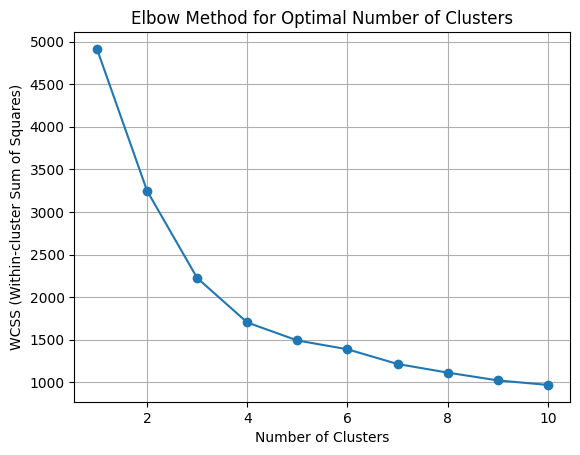

Cluster assignments (first 5 rows):
[1 0 2 0 0]


In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Step 1: Use factor scores from factor analysis for clustering
# Using the factors as input for clustering
X = factors  # This is the output from the Factor Analysis with 3 factors

# Step 2: Determine the optimal number of clusters using the Elbow Method
wcss = []  # List to hold the within-cluster sum of squares

# Try different cluster numbers to find the optimal one
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)  # Inertia: sum of squared distances to the nearest cluster center

# Plot the Elbow graph
plt.plot(range(1, 11), wcss, marker='o', linestyle='-')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS (Within-cluster Sum of Squares)')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.grid(True)
plt.show()

# Step 3: Fit K-Means with the selected number of clusters (choose based on elbow plot)
optimal_clusters = 3  # For example, based on Elbow plot
kmeans = KMeans(n_clusters=optimal_clusters, random_state=0)
clusters = kmeans.fit_predict(X)

# Display the cluster assignments for the first 5 data points
print("Cluster assignments (first 5 rows):")
print(clusters[:5])
